<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/visualize_training_history_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Display Deep Learning Model Training History in Keras

##Visualize Model Training History in Keras

**One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.**

**The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.**

**The plots can provide an indication of useful things about the training of the model, such as:**

**It’s speed of convergence over epochs (slope).**

**Whether the model may have already converged (plateau of the line).
Whether the mode may be over-learning the training data (inflection for validation line).**

**The example collects the history, returned from training the model and creates two charts:**

**A plot of accuracy on the training and validation datasets over training epochs.**

**A plot of loss on the training and validation datasets over training epochs.**

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


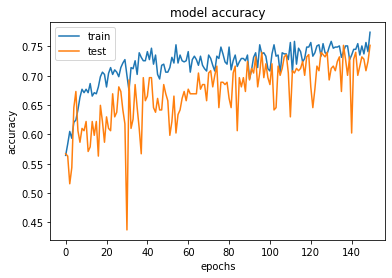

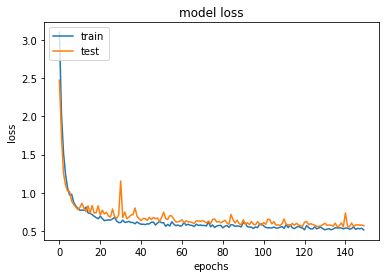

In [8]:
#visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from urllib.request import urlopen
%matplotlib inline
#laod pima indians dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
dataset = numpy.loadtxt(urlopen(url), delimiter=",")
#split into input(X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
#create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
#list all data in history
print(history.history.keys())
#summerize the history for accuray
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summerize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.**

**From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.**